In [ ]:
# source: http://wikistack.com/traveling-salesman-problem-dynamic-programming/

In [71]:
filename = "last20.txt"

def dist(p1,p2):
    from math import sqrt
    d = (float(p1[0])-float(p2[0]))**2 + (float(p1[1]) - float(p2[1]))**2
    return sqrt(d)

def create_m(filename):
    coo_x_y = []
    with open("../data/"+filename) as f:
        n=int(f.next().strip())
        for line in f:
            coo_x_y.append(line.strip().split())
    matrix = []
    for i in range(n):
        tmp = []
        for j in range(n):
            tmp.append(dist(coo_x_y[i], coo_x_y[j]))
        matrix.append(tmp)
    return matrix,coo_x_y

In [72]:
matrix,coo_x_y = create_m(filename)

matrix = [[0,8,12,26],[8,0,21,10],[12,21,0,30],[25,10,30,0]]

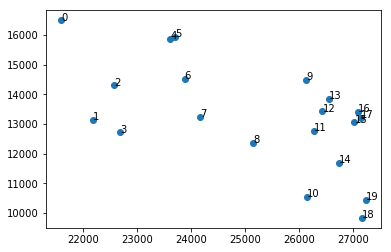

In [73]:
x = [float(coo[0]) for coo in coo_x_y]
y= [float(coo[1]) for coo in coo_x_y]
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

for i in range(len(x)):
    plt.annotate(i, (x[i],y[i]))


In [74]:
graph = matrix
n = len(graph)
npow = 2**n
g = [[-1]*npow for i in range(n)]


p = [[[None,None] for j in  range(npow)] for i in range(n)]

for i in range(n):
    g[i][0] = graph[i][0]
    

In [75]:
def tsp(start, set):
    result = -1
    if g[start][set] !=-1:
        return g[start][set]
    else:
        for x in range(n):
            mask = npow -1 -2**x
            masked = set & mask
            if masked != set:
                temp = graph[start][x] + tsp(x, masked)
                if result == -1 or result > temp:
                    result = temp
                    p[start][set] = [x,masked]
        g[start][set] = result
        return result

In [76]:
tsp(0,npow-2)

22597.661016862963

In [78]:
point = 0
index = npow-2

points=[point]
for i in range(n-1):
    points.append(p[point][index][0])
    
    index = p[point][index][1]
    point = points[-1]
points.append(0)

print points

[0, 2, 1, 3, 7, 8, 10, 18, 19, 14, 11, 15, 17, 16, 12, 13, 9, 6, 5, 4, 0]


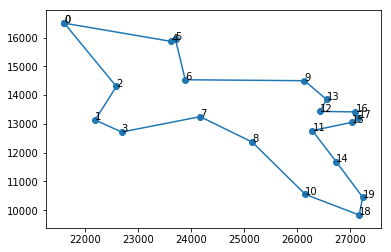

In [79]:
x = [float(coo_x_y[i][0]) for i in points]
y= [float(coo_x_y[i][1]) for i in points]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)
plt.scatter(x,y)

for i in range(len(x)):
    plt.annotate(points[i], (x[i],y[i]))
